# RESUME SCREENING- Using NLP

In [97]:
# Importing necessary modules 
import pandas as pd
import plotly.express as px
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [98]:
#   Setting the fontsyle 
COLOR = 'black' 
plt.rcParams['font.size'] =10 
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR 
plt.rcParams['xtick.color'] = COLOR 
plt.rcParams['ytick.color'] = COLOR


In [99]:
#   Importing datasets 
data=pd.read_csv('UpdatedResumeDataSet.csv')
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [100]:
data.shape

(962, 2)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [102]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [103]:
data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [104]:
data['Category'].nunique()

25

In [105]:
categories = data['Category'].value_counts().reset_index()
categories

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


In [106]:
fig = px.histogram(data, x="Category", title="DISTRIBUTION OF JOBS CATEGORIES",color_discrete_sequence=["teal"]).update_xaxes(categoryorder="total descending")
fig.show()

In [107]:
series=data['Category'].value_counts()
series

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

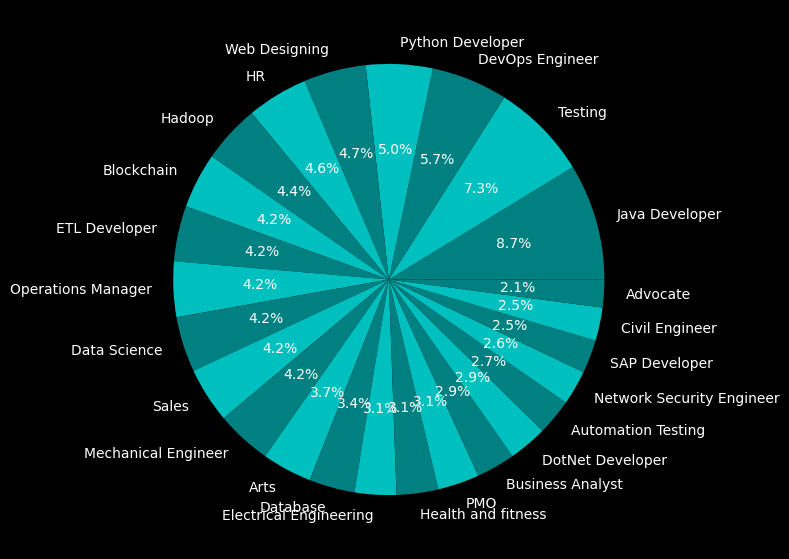

In [108]:
plt.style.use('dark_background')  
plt.figure(figsize=(12,7))
colors=['teal','c']
plt.pie(series, labels= categories['index'], colors = colors, autopct='%.1f%%')
plt.show()

In [109]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label_encoded_data = label.fit_transform(data['Category'])
data['new_Category']=label_encoded_data
data.head()

,Category,Resume,new_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6


In [110]:
Categories=data['Category']

In [111]:
import re
def clean_function(resumeText):
    resumeText = re.sub('[^a-zA-Z]', ' ',resumeText)
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = resumeText.lower()
    

    return resumeText

In [112]:
data['cleaned_resume'] = data['Resume'].apply(lambda x: clean_function(x))
data.head()


,Category,Resume,new_Category,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,6,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6,education details may to may b e uit rgpv data...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6,areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6,skills r python sap hana tableau sap hana sql ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6,education details mca ymcaust faridabad haryan...


In [113]:
def process_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    
    # Normalize the words using lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    
    # Join the words back into a single text
    processed_text = " ".join(words)
    
    return processed_text

In [114]:
data['cleaned_resume'] = data['cleaned_resume'].apply(lambda x: process_text(x))
data

,Category,Resume,new_Category,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,6,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6,education detail may may b e uit rgpv data sci...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6,area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6,education detail mca ymcaust faridabad haryana...
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,23,computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,23,willingness ept challenge positive thinking go...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",23,personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,23,computer skill software knowledge m power poin...


In [115]:
Text=data.cleaned_resume
Text

0      skill programming language python panda numpy ...
1      education detail may may b e uit rgpv data sci...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness ept challenge positive thinking go...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge m power poin...
961    skill set o window xp database mysql sql serve...
Name: cleaned_resume, Length: 962, dtype: object

# Word cloud


In [116]:
result_string = ' '.join(Text)
result_string 

'skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist elerating review process run analytics generate report core membe

In [117]:
wordcloud = WordCloud (width=1000, height=1000).generate(result_string)

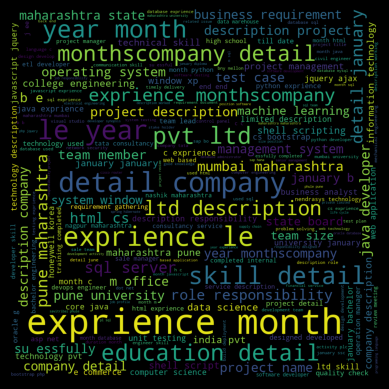

In [118]:
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
#plt.margins(x-0, y-0)
plt.show()

In [119]:
columns_to_remove = ['Resume','new_Category']

In [120]:
df = data.drop(columns_to_remove, axis=1)
df

,Category,cleaned_resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may b e uit rgpv data sci...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skill proficient m office word basic ...
958,Testing,willingness ept challenge positive thinking go...
959,Testing,personal skill quick learner eagerness learn n...
960,Testing,computer skill software knowledge m power poin...


In [121]:
CATEGORY=categories.head(6)
CATEGORY

,index,Category
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44


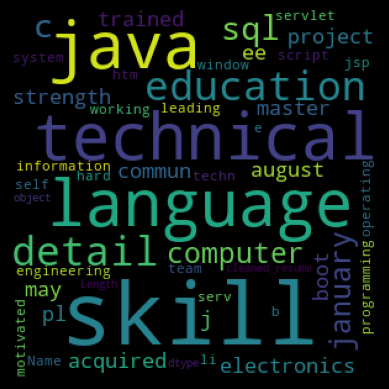

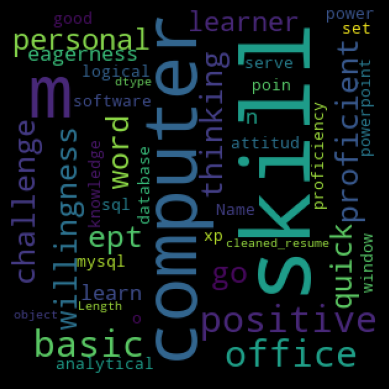

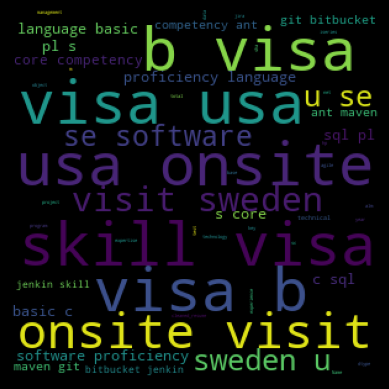

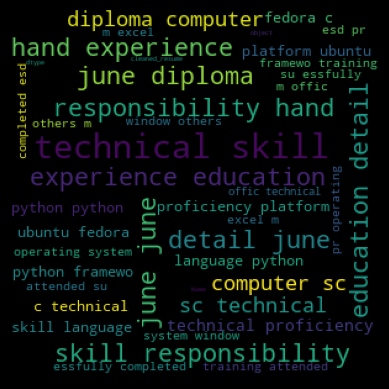

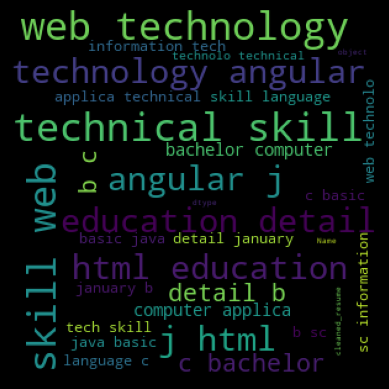

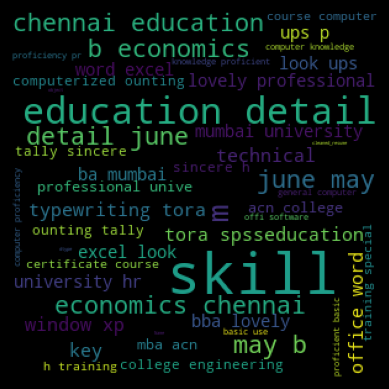

In [122]:
for i in CATEGORY['index']:
    group=data.groupby('Category')
    r=group.get_group(i)
    c=r.cleaned_resume
    wordcloud = WordCloud (width=300, height=300).generate(str(c))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [123]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# group = data.groupby('Category')
# fig, axes = plt.subplots(1, len(CATEGORY['index']), figsize=(15, 5))

# for i, category_index in enumerate(CATEGORY['index']):
#     r = group.get_group(category_index)
#     c = r.cleaned_resume
#     wordcloud = WordCloud(width=100, height=100).generate(str(c))
#     axes[i].imshow(wordcloud)
#     axes[i].set_title(category_index)
#     axes[i].axis("off")

# plt.tight_layout()
# plt.show()

In [124]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# group = data.groupby('Category')
# fig, axes = plt.subplots(2, len(CATEGORY['index']) // 2, figsize=(8,8))

# for i, category_index in enumerate(CATEGORY['index']):
#     r = group.get_group(category_index)
#     c = r.cleaned_resume
#     wordcloud = WordCloud(width=1000, height=1000).generate(str(c))
#     row = i // (len(CATEGORY['index']) // 2)
#     col = i % (len(CATEGORY['index']) // 2)
#     axes[row, col].imshow(wordcloud)
#     axes[row, col].set_title(category_index)
#     axes[row, col].axis("off")

# plt.tight_layout()
# plt.show()

In [125]:
Y=data['new_Category']
Y

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: new_Category, Length: 962, dtype: int32

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

# CountVectorizer

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
Cv=CountVectorizer()
x=Cv.fit_transform(Text)
x

<962x6368 sparse matrix of type '<class 'numpy.int64'>'
	with 156392 stored elements in Compressed Sparse Row format>

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [129]:
models={'logistic':{'model':LogisticRegression(),'params':{}},'random_forest':{'model':RandomForestClassifier(),
                                                                               'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},'Gaussian':{'model':GaussianNB(),'params':{}}}
result=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x.toarray(),Y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result.append(t_res)
f=pd.DataFrame(result)
f.sort_values('best_score').tail(1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\User\anaconda3\lib\site-packages\sk

,model,best_params,best_score
2,decision_tree,{},0.996891


In [130]:
f

,model,best_params,best_score
0,logistic,{},0.995855
1,random_forest,{'n_estimators': 10},0.995855
2,decision_tree,{},0.996891
3,Gaussian,{},0.995855


In [131]:
result


[{'model': 'logistic', 'best_params': {}, 'best_score': 0.9958549222797928},
 {'model': 'random_forest',
  'best_params': {'n_estimators': 10},
  'best_score': 0.9958549222797928},
 {'model': 'decision_tree',
  'best_params': {},
  'best_score': 0.9968911917098445},
 {'model': 'Gaussian', 'best_params': {}, 'best_score': 0.9958549222797928}]

In [132]:
svc_model=SVC()
gds=GridSearchCV(svc_model,{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']},cv=5,return_train_score=True)
gds.fit(x,Y)
gds.cv_results_
data=pd.DataFrame(gds.cv_results_)
gds.best_params_


{'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [133]:
gds.best_score_

0.9958549222797928

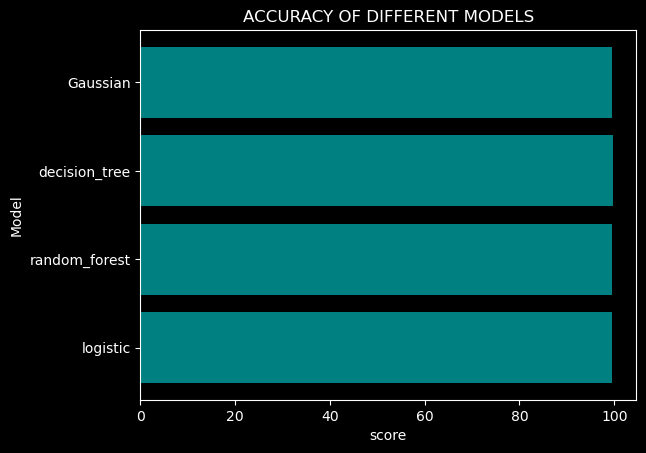

In [134]:
colors=['teal','c']
X=f.model
y=(f.best_score)*100
plt.barh(X,y,color='teal')
plt.title('ACCURACY OF DIFFERENT MODELS')
plt.ylabel('Model')
plt.xlabel('score')
plt.show()

In [135]:
X_train,X_test,y_train,y_test = train_test_split(x,Y,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 6368)
(193, 6368)


In [136]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.97
Accuracy of KNeighbors Classifier on test set: 0.93

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       0.90      1.00      0.95         9
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         5
           6       0.88      0.78      0.82         9
           7       1.00      0.57      0.73         7
           8       1.00      0.91      0.95        11
           9       1.00      0.78      0.88         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       0.38      1.00      0.56         5
          13       1.00      1.00      1.

In [137]:
#FITING decision_tree

In [138]:
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [139]:
dtree.score(x_test,y_test)

0.9792746113989638

In [140]:
#PREDICTION

In [141]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text= re.sub('RT|cc', ' ',text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    text=text.lower()
    stop_words=set(stopwords.words('english'))
    tokens=nltk.word_tokenize(text)
    text=[word for word in tokens if not word in stop_words]
    text= ' '.join(text)
    #lemmatization
    lemmatizer=nltk.WordNetLemmatizer()
    tokens= nltk.word_tokenize(text)
    text=[lemmatizer.lemmatize(word) for word in tokens]
    text= ' '.join(text)
    
    return text

In [142]:

new="Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details "

new1=clean_text(new)
new1=[new1]
new1
trans=Cv.transform(new1)
dtree.predict(trans)

array([20])

In [144]:
new="TESTING- Exprience - 24 monthsWINDOWS XP- Exprience - 24 months CSS- Exprience - 6 monthsDATABASE- Exprience - 6 months DATABASE TESTING- Exprience - 6 monthsCompany Details  company - M-Tech Innovations Ltddescription - Responsibilities â¢     Analyzing the Testing Requirements â¢     Preparing Test Plans, Test Scenarios â¢     Preparing Test Cases â¢     Executing the test cases â¢     Tracking bugs â¢     Coordinating developers in order to fix it â¢     Preparing test summary reports â¢     Reporting quality manager â¢     Attending meeting"

new1=clean_text(new)
new1=[new1]
new1
trans=Cv.transform(new1)
dtree.predict(trans)

array([2])

# TfidfVectorizer

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x1=tfidf.fit_transform(Text)
x1

<962x6368 sparse matrix of type '<class 'numpy.float64'>'
	with 156392 stored elements in Compressed Sparse Row format>

In [146]:
models={'logistic':{'model':LogisticRegression(),'params':{}},'random_forest':{'model':RandomForestClassifier(),
                                                                               'params':{'n_estimators':[1,10,20,100]}},
        'decision_tree':{'model':DecisionTreeClassifier(),'params':{}},'Gaussian':{'model':GaussianNB(),'params':{}}}
result1=[]
for i in models:
    a=models.get(i)
    model=a.get('model')
    params=a.get('params')
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x1.toarray(),Y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={'model':i,'best_params':bp,'best_score':bs}
    result1.append(t_res)
f1=pd.DataFrame(result)
f1.sort_values('best_score').tail(1)

,model,best_params,best_score
2,decision_tree,{},0.996891


In [147]:
f1

,model,best_params,best_score
0,logistic,{},0.995855
1,random_forest,{'n_estimators': 10},0.995855
2,decision_tree,{},0.996891
3,Gaussian,{},0.995855


In [148]:
result1

[{'model': 'logistic', 'best_params': {}, 'best_score': 0.9958549222797928},
 {'model': 'random_forest',
  'best_params': {'n_estimators': 10},
  'best_score': 0.9968911917098445},
 {'model': 'decision_tree',
  'best_params': {},
  'best_score': 0.9958549222797928},
 {'model': 'Gaussian', 'best_params': {}, 'best_score': 0.9958549222797928}]

In [149]:
svc_model=SVC()
gds1=GridSearchCV(svc_model,{'gamma':[1,2,100],'C':[1,2,5,100],'kernel':['poly','linear','sigmoid','rbf']},cv=5,return_train_score=True)
gds1.fit(x1,Y)
gds1.cv_results_
data=pd.DataFrame(gds1.cv_results_)
gds1.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'poly'}

In [150]:
gds1.best_score_

0.9958549222797928

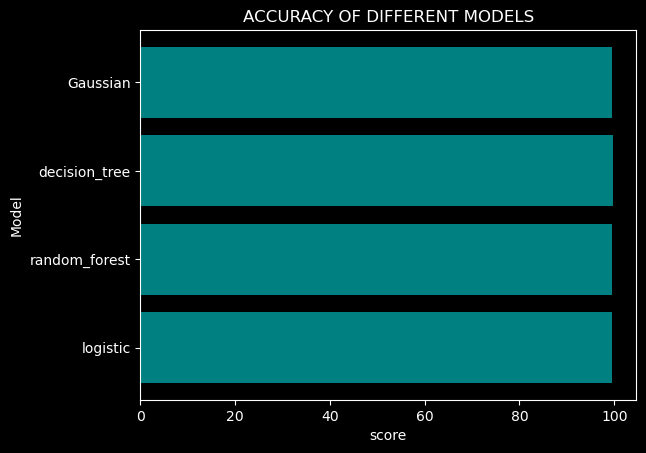

In [151]:
colors=['teal','c']
q=f1.model
y=(f1.best_score)*100
plt.barh(q,y,color='teal')
plt.title('ACCURACY OF DIFFERENT MODELS')
plt.ylabel('Model')
plt.xlabel('score')
plt.show()

In [152]:
X_train,X_test,y_train,y_test = train_test_split(x1,Y,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 6368)
(193, 6368)


In [153]:
clf1= OneVsRestClassifier(KNeighborsClassifier())
clf1.fit(X_train, y_train)
prediction1= clf1.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf1, metrics.classification_report(y_test, prediction1)))

Accuracy of KNeighbors Classifier on training set: 0.05
Accuracy of KNeighbors Classifier on test set: 0.03

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

In [154]:
#fitting Gaussian

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1.toarray(),Y,test_size=0.2,random_state=42)
Gau= GaussianNB()

In [156]:
Gau.fit(x_train, y_train)

GaussianNB()

In [157]:
Gau.score(x_test,y_test)

0.9948186528497409